# Исследование развлекательного приложения Procrastinate Pro+
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### Загрузка данных и подготовка их к анализу

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`.
- заказы: `/datasets/orders_info_short.csv`. 
- расходы: `/datasets/costs_info_short.csv`.

Изучим данные и выполним предобработку. 
Есть ли в данных пропуски и дубликаты? Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратим внимание на столбцы с датой и временем.

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
from datetime import datetime, timedelta

In [2]:
#вывод всех столбцов
pd.set_option('display.max_columns', None)

In [3]:
#отображение всех выводов из одной ячейки
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#сохраняем данные в переменные, разделитель запятая
visits, orders, costs = (
    pd.read_csv('./datasets/visits_info_short.csv', sep=','), #визиты
    pd.read_csv('./datasets/orders_info_short.csv', sep=','), #заказы
    pd.read_csv('./datasets/costs_info_short.csv', sep=',') #расходы
)

In [5]:
#функция приведения названия колонок к нижнему регистру, замена пробелов на "_"
def rename_col(data):
    data.columns = data.columns.str.lower().str.replace(' ', '_')
    return data.columns

In [6]:
#функция вывод первых 5 строк, общей информации и количества пропусков в таблице
def base_info(data):
    print('Первые 5 строк таблицы')
    display(data.head())
    
    print('Общая информация о таблице')
    display(data.info())
    
    print('Информация о пропусках в таблице')
    display(data.isna().sum())

In [7]:
#изучим таблицу с визитами
base_info(visits)

Первые 5 строк таблицы


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Информация о пропусках в таблице


User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [8]:
#изучим таблицу с заказами
base_info(orders)

Первые 5 строк таблицы


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Информация о пропусках в таблице


User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [9]:
#изучим таблицу с расходами на рекламу
base_info(costs)

Первые 5 строк таблицы


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Информация о пропусках в таблице


dt         0
Channel    0
costs      0
dtype: int64

In [10]:
#приведем название колонок к привычному виду: с маленькой буквы, с "_"
rename_col(visits)
rename_col(orders)
rename_col(costs)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

В данных нет пропусков, все типы данных соответствуют содержанию, кроме столбцов с датой и временем.
Приведем их к нужному типу

In [11]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [12]:
#проверка на полные дубликаты строк
print('Количество дубликатов в таблице визиты ', visits.duplicated().sum())
print('Количество дубликатов в таблице заказы ', orders.duplicated().sum())
print('Количество дубликатов в таблице расходы ', costs.duplicated().sum())

Количество дубликатов в таблице визиты  0
Количество дубликатов в таблице заказы  0
Количество дубликатов в таблице расходы  0


In [13]:
# проверка начало сессии позже конца
visits.query('session_start>session_end')

,user_id,region,device,channel,session_start,session_end


In [14]:
#статистические показатели таблицы визиты
visits.describe(include='all')

/tmp/ipykernel_48/577023882.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  visits.describe(include='all')
/tmp/ipykernel_48/577023882.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  visits.describe(include='all')


,user_id,region,device,channel,session_start,session_end
count,3.099010e+05,309901,309901,309901,309901,309901
unique,NaN,4,4,11,306813,306793
top,NaN,United States,iPhone,organic,2019-06-27 14:56:41,2019-08-04 10:32:15
freq,NaN,207327,112603,107760,3,3
first,NaN,NaN,NaN,NaN,2019-05-01 00:00:41,2019-05-01 00:07:06
last,NaN,NaN,NaN,NaN,2019-10-31 23:59:23,2019-11-01 01:38:46
mean,4.997664e+11,NaN,NaN,NaN,NaN,NaN
std,2.887899e+11,NaN,NaN,NaN,NaN,NaN
min,5.993260e+05,NaN,NaN,NaN,NaN,NaN
25%,2.493691e+11,NaN,NaN,NaN,NaN,NaN


- Данные о визитах представлены за период 01 мая - 31 октября 2019 (начало визита)
- Интервал похож на тот, который заявлялся при постановке задачи, соответствует ли он полностью - узнаем, когда подготовим профили пользоватей, из них поймем диапозон дат привлечения.
- Пользователи приходят из 4 регионов, с 4 разных устройств и из 11 каналов, причем больше всего из United States, с iPhone, из органики

In [15]:
#статистические показатели таблицы заказы
orders.describe(include='all')

/tmp/ipykernel_48/1595430990.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe(include='all')


,user_id,event_dt,revenue
count,4.021200e+04,40212,40212.000000
unique,NaN,40163,NaN
top,NaN,2019-09-29 09:03:24,NaN
freq,NaN,2,NaN
first,NaN,2019-05-01 00:28:11,NaN
last,NaN,2019-10-31 23:56:56,NaN
mean,4.990295e+11,NaN,5.370608
std,2.860937e+11,NaN,3.454208
min,5.993260e+05,NaN,4.990000
25%,2.511324e+11,NaN,4.990000


- Данные о заказах представлены за период 01 мая - 31 октября 2019
- Основная часть заказов приносит 4,99, но есть и дорогие, по 49,99. Таких заказов довольно много, т.ч это не ошибка данных

In [16]:
orders.revenue.value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

In [17]:
#статистические показатели таблицы расходы
costs.describe(include='all')

,dt,channel,costs
count,1800,1800,1800.000000
unique,180,10,NaN
top,2019-09-07,MediaTornado,NaN
freq,10,180,NaN
mean,NaN,NaN,58.609611
std,NaN,NaN,107.740223
min,NaN,NaN,0.800000
25%,NaN,NaN,6.495000
50%,NaN,NaN,12.285000
75%,NaN,NaN,33.600000


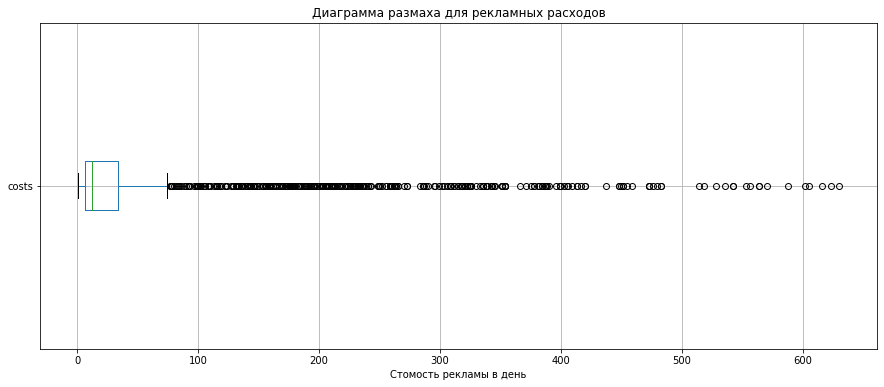

In [18]:
costs.boxplot('costs', figsize = (15,6), vert=False)
plt.title('Диаграмма размаха для рекламных расходов')
plt.xlabel('Стомость рекламы в день');

Разброс ежедневных трат на рекламу очень велик, в основном в день тратится 12,29, но есть выбросы, поэтому средний расход 58,61 в день

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [19]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [20]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
        
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left')
    
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [21]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [22]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
   
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [23]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [24]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [25]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [26]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

#### Составление профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей.

In [27]:
#вызов функции составления профилей
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [28]:
min_dt = profiles.dt.min()
max_dt = profiles.dt.max()
print(f'Минимальная дата привлечения пользователей {min_dt}')
print(f'Максимальная дата привлечения пользователей {max_dt}')

Минимальная дата привлечения пользователей 2019-05-01
Максимальная дата привлечения пользователей 2019-10-27


Таким образом мы видим, что данные представлены почти за полгода. Интервал дат привлечения соответствует заявленному в ТЗ. Профиль пользователя содержит информацию о дате привлечения, стоимости и канале привлечения, стране и устройству, с которого человек заходил, а также о том, является ли пользователь плательщиком.

In [29]:
print (f'Общий процент платящих клиентов {profiles.payer.mean():.2%}')

Общий процент платящих клиентов 5.92%


Ниже изучим платящих пользователей в разрезе стран, устройств и каналов привлечения.

#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [30]:
#группировка пользователей по регионам
user_region = (profiles
    .groupby('region')
    .agg (users = ('user_id','count'), payer_count = ('payer','sum'), payer_pct = ('payer','mean'))
    .sort_values(by='payer_count', ascending = False)  
    .reset_index()
)  
user_region.payer_pct = round(user_region.payer_pct*100,2)

In [31]:
user_region

,region,users,payer_count,payer_pct
0,United States,100002,6902,6.90
1,UK,17575,700,3.98
2,France,17450,663,3.80
3,Germany,14981,616,4.11


Больше всего пользователей приходит из США (100 тыс.), здесь же самое высокое количество платящих пользователей в абсолютном значении, и самая высокая конверсия из посетителей в покупатели (6,9%). В трех других странах в разы меньше пользователей, а конверсия ниже на 2,8-3,1 п.п.

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [32]:
#группировка пользователей по устройствам
user_device = (profiles
    .groupby('device')
    .agg (users = ('user_id','count'), payer_count = ('payer','sum'), payer_pct = ('payer','mean'))
    .sort_values(by='payer_count', ascending = False)  
    .reset_index()
)     
user_device.payer_pct = round(user_device.payer_pct*100,2)

In [33]:
user_device

,device,users,payer_count,payer_pct
0,iPhone,54479,3382,6.21
1,Android,35032,2050,5.85
2,Mac,30042,1912,6.36
3,PC,30455,1537,5.05


Большая часть клиентов пользуется iPhone (54,5 тыс), пользователей других устройств примерно на 30% меньше. Среди владельцев iPhone же больше всего платящих пользователей в абсолютном значении, при этом конверсия высокая как у этих клиентов, так и у пользователей Mac (6,21% и 6,36% соответственно).

#### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [34]:
#группировка пользователей по каналам привлечения
user_channel = (profiles
    .groupby('channel')
    .agg (users = ('user_id','count'), payer_count = ('payer','sum'), payer_pct = ('payer','mean'))
    .sort_values(by='payer_count', ascending = False)  
    .reset_index()
) 
user_channel.payer_pct = round(user_channel.payer_pct*100,2)

In [35]:
user_channel

,channel,users,payer_count,payer_pct
0,FaceBoom,29144,3557,12.20
1,TipTop,19561,1878,9.60
2,organic,56439,1160,2.06
3,WahooNetBanner,8553,453,5.30
4,AdNonSense,3880,440,11.34
5,RocketSuperAds,4448,352,7.91
6,LeapBob,8553,262,3.06
7,OppleCreativeMedia,8605,233,2.71
8,lambdaMediaAds,2149,225,10.47
9,YRabbit,4312,165,3.83


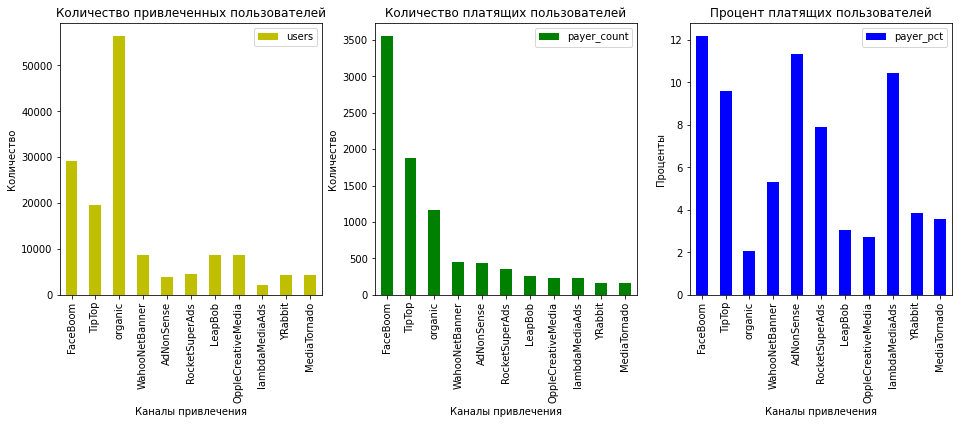

In [36]:
#отражу на графике количество клиентов, количество платящих, долю платящих в разбивке по источникам привлечения
plt.figure(figsize=(16, 5))

ax1 = plt.subplot(1, 3, 1)
user_channel[['channel','users']].plot(kind='bar', x = 'channel', ax=ax1, color = 'y');
plt.xlabel('Каналы привлечения')
plt.ylabel('Количество')
plt.title('Количество привлеченных пользователей')

ax2 = plt.subplot(1, 3, 2)
user_channel[['channel', 'payer_count']].plot(kind='bar', x = 'channel', ax=ax2, color = 'g');
plt.xlabel('Каналы привлечения')
plt.ylabel('Количество')
plt.title('Количество платящих пользователей')

ax3 = plt.subplot(1, 3, 3)
user_channel[['channel', 'payer_pct']].plot(kind='bar', x = 'channel', ax=ax3, color = 'b')
plt.xlabel('Каналы привлечения')
plt.ylabel('Проценты')
plt.title('Процент платящих пользователей');

- Больше всего клиентов приходит из органики, в абсолютном значении конверсия в платящих пользователей также высокая (1160 чел.), хотя процент минимальный (2%). Но поскольку это т.н. "бесплатные" клиенты, то показатель очень хороший.
- На втором месте канал FaceBoom, в абсолютном значении конверсия в платящих пользователей самая высокая (3557 чел.), в процентах тоже (12,2%)
- На третьем месте канал TipTop, платящих пользователей из него привлекли почти 2 тыс, конверсия 9,6%
- Также хочу выделить каналы AdNonSense, lambdaMediaAds с конверсией выше 10%, на первый взгляд они кажутся перспективными, хотя необходимо изучить ROI клиентов, если оно выше 100%, то имеет смысл больше маркетингового бюджета направить в эти каналы.

#### Выводы по разделу

- Мы создали профили пользователей, они содержит информацию о дате привлечения, стоимости и канале привлечения, стране и устройству, а также о том, является ли пользователь плательщиком.
- Всего пользователи приходят из 4 стран: США, Германия, Франция, Великобритания. Больше всего - из США (100 тыс.), здесь же самое высокое количество платящих пользователей в абсолютном значении.
- Пользователи заходят с 4 устройств: iPhone, Mac, Android, PC. Большая часть клиентов пользуется iPhone (54,5 тыс), пользователей других устройств примерно на 30% меньше.
- Используется 11 каналов привлечения. Больше всего клиентов приходит из FaceBoom, TipTop и органики

### Маркетинг

#### Посчитаем общую сумму расходов на маркетинг.

In [37]:
all_costs = costs.costs.sum()
print(f'Общая сумма расходов на маркетинг {round(all_costs,2)}')

Общая сумма расходов на маркетинг 105497.3


#### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [38]:
#группировка таблицы по тратам на рекламные источники
costs_channel = (costs
    .groupby('channel')
    .agg (sum_costs = ('costs','sum'))
    .sort_values(by='sum_costs', ascending = False)  
    .reset_index()
)   

In [39]:
costs_channel

,channel,sum_costs
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


Больше всего денег потратили на TipTop (54,7 тыс), на втором месте FaceBoom (32,4 тыс.). Расходы на остальные источники все вместе составили менее 20% маркетингового бюджета.

#### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [40]:
#добавляем столбцы с месяцем и с номером недели
costs['month'] = costs['dt'].astype('datetime64[M]')
costs['week'] = costs['dt'].astype('datetime64').dt.isocalendar().week

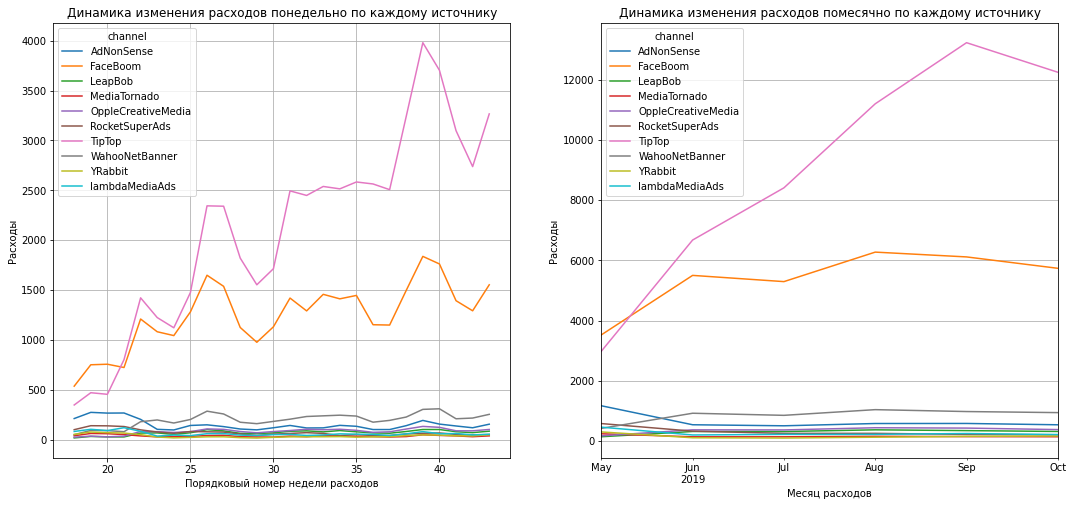

In [41]:
#график понедельного и помесячного изменения расходов
plt.figure(figsize=(18, 8))

ax1 = plt.subplot(1, 2, 1)
week_costs = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
week_costs.plot(grid=True, ax=ax1)

plt.xlabel('Порядковый номер недели расходов')
plt.ylabel('Расходы')
plt.title('Динамика изменения расходов понедельно по каждому источнику')

ax2 = plt.subplot(1, 2, 2)
month_costs = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
month_costs.plot(grid=True, ax=ax2)

plt.xlabel('Месяц расходов')
plt.ylabel('Расходы')
plt.title('Динамика изменения расходов помесячно по каждому источнику')

plt.show();

- Из графиков видно, что недельные и месячные средние расходы по большинству источников стабильны и находятся на невысоком уровне.
- Графике повторяют друг друга, но в месячном линии более плавные, информация сглажена за счет большего "окна"
- В первые примерно два месяца высокими темпами росли расходы на FaceBoom и TipTop
- Далее расходы на FaceBoom стабилизировались, находятся на уровне примерно 6000 в месяц.
- Рост расходов на TipTop продолжается, похоже, маркетологи считают этот канал самым успешным.

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [42]:
#таблица CAC по каналам
cac_channel = (profiles.groupby('channel')
               [['channel','acquisition_cost' ]]
               .mean()
               .sort_values(by='acquisition_cost', ascending = False)
              )
cac_channel

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [43]:
#средний САС по проекту
avr_cac = profiles.query('channel != "organic"').acquisition_cost.mean()
avr_cac

1.1274813239427588

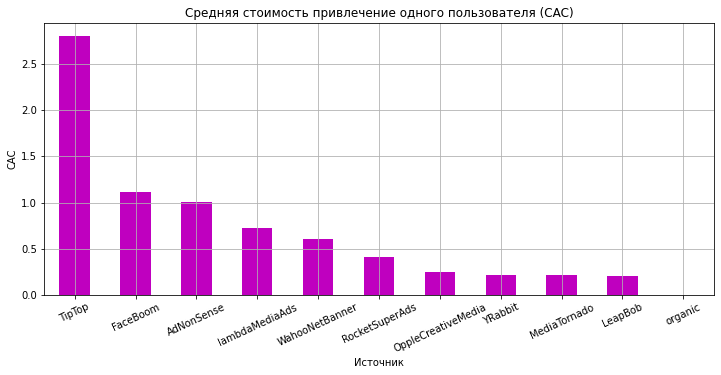

In [44]:
#визуализация таблицы CAC по каналам
fig, ax = plt.subplots(figsize=(12,5))

cac_channel.plot(kind = 'bar', ax=ax, grid = True, color = 'm', legend=False)

ax.set_xticks(np.arange(
    len(
        list(cac_channel.index)
    )))
ax.set_xticklabels(list(cac_channel.index), rotation=25)
plt.xlabel('Источник')
plt.ylabel('CAC')
plt.title('Cредняя стоимость привлечение одного пользователя (CAC)')
plt.show;

- Cредняя стоимость привлечение одного пользователя из TipTop существенно выше привлечения из других источников, на втором месте FaceBoom, на третьем AdNonSense.
- И вновь встает вопрос, оправдана ли (окупается ли) такая высокая стоимость привлечения. На этот вопрос сможем ответить ниже

#### Выводы по разделу

- Общая сумма расходов на маркетинг 105497.3
- Больше всего денег потратили на TipTop (54,7 тыс), на втором месте FaceBoom (32,4 тыс.). Расходы на остальные источники все вместе составили менее 20% маркетингового бюджета.
- В динамике расходы по большинству источников стабильны и находятся на невысоком уровне, выделяются высокими темпами FaceBoom и TipTop. При этом расходы на FaceBoom стабилизировались, находятся на уровне примерно 6000 в месяц, рост расходов на TipTop продолжается.
- Одновременно с этим средняя стоимость привлечение одного пользователя из TipTop существенно выше привлечения из других источников, на втором месте FaceBoom, на третьем AdNonSense.
- Важно выяснить, окупается ли такая высокая стоимость привлечения.

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. 

На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

Органических пользователей оставляем в анализе. В ROI они не фигурируют, поскольку стоимость их привлечения равна 0, однако в абсолютном значении приносят много продаж.

In [45]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI

Исключила органику из анализа

In [46]:
profiles = profiles.query('channel != "organic"')

In [47]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)


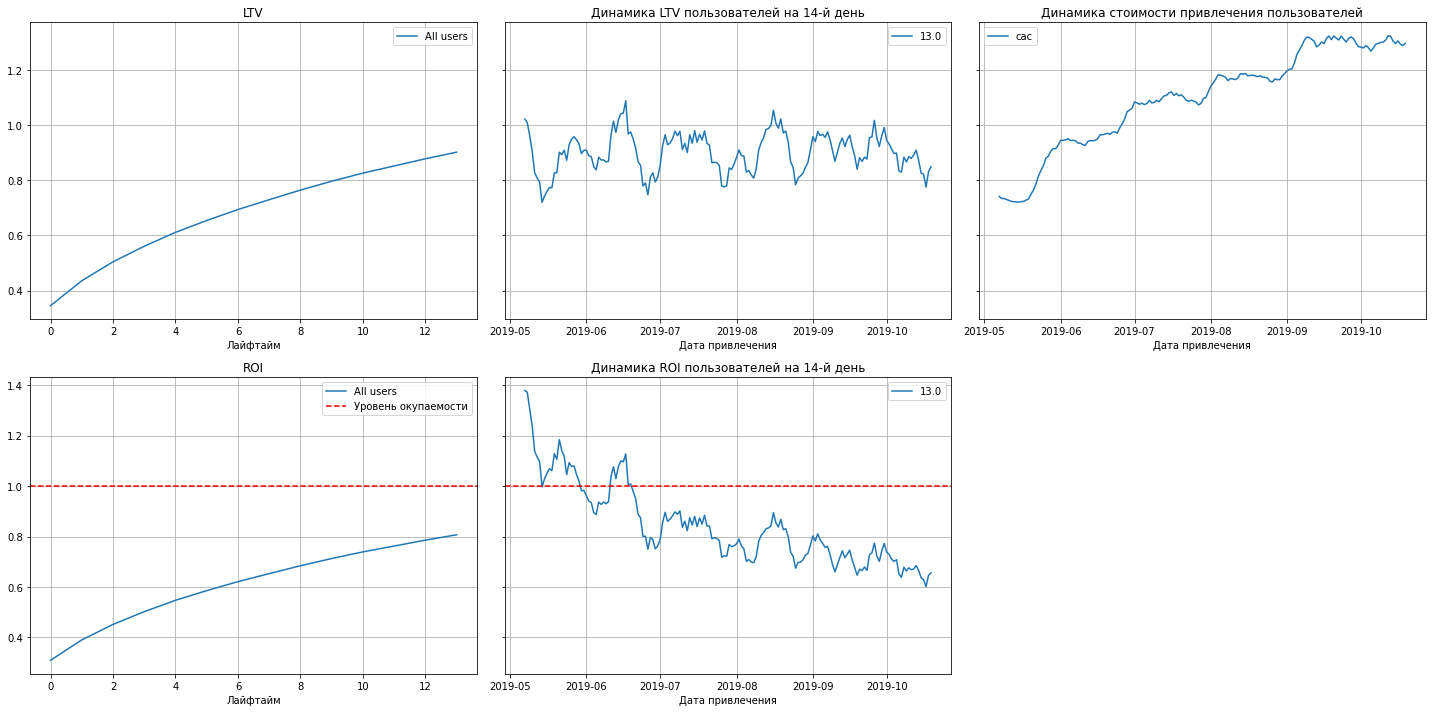

In [48]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

-  **Реклама, направленная на привлечение пользователей в целом, не окупается.** LTV по лайфтайму растет, также как и ROI, однако ROI не достигает уровня окупаемости.
- На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей
- Стоимость привлечения одного пользователя растет более быстрыми темпами, чем доход с одного пользователя
- Если посмотреть в динамике, то в мае и июне проект окупался, а вот дальше уже нет

Необходимо изучить детальнее факторы, которые влияют на окупаемость.

#### Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

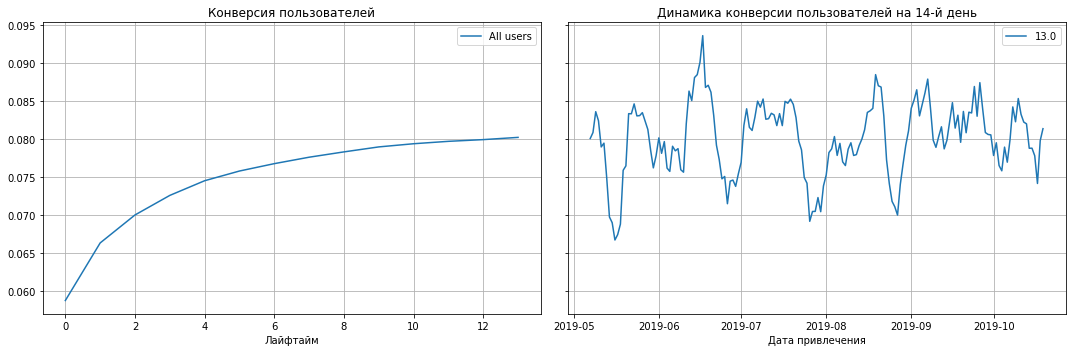

In [49]:
# смотрим общую конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

#визуализируем
plot_conversion(conversion_grouped, conversion_history, horizon_days)

- Конверсия пользователей растет весь период лайфтайма
- На динамику конверсии влияет сезонный фактор, но в целом показатель достаточно стабилен, находится в диапазоне от 7 до 9%

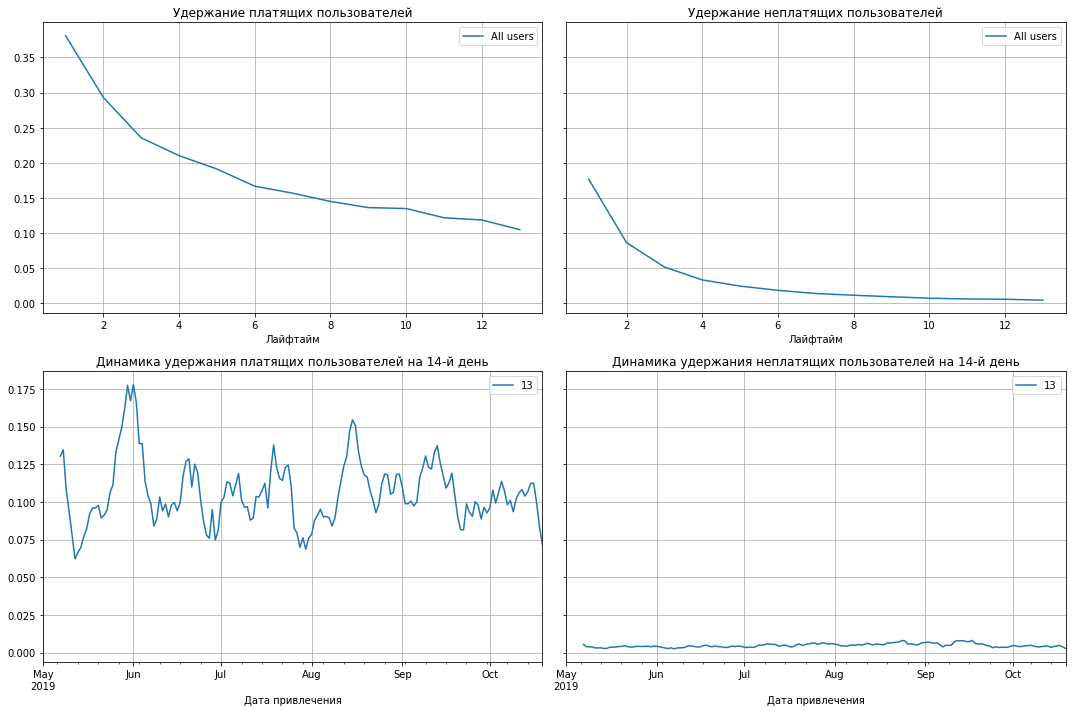

In [50]:
# смотрим общее удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

#визуализируем в разрезе платящих/неплатящих пользователей
plot_retention(retention_grouped, retention_history, horizon_days) 

- Удержание платящих выше, чем неплатящих, плавно снижается до 10% в конце второй недели
- Удержание неплатящих уже к третьему дню снижается до 5%, а к концу второй недели достигает практически нуля
- Динамика удержания для обоих категорий стабильна

Т.о ни анализ общей конверсии, ни общего удержания не дал нам ответа на вопрос, почему реклама не окупается. Дальше посмотрим окупаемость в разбивке по устройствам, странам, каналам.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

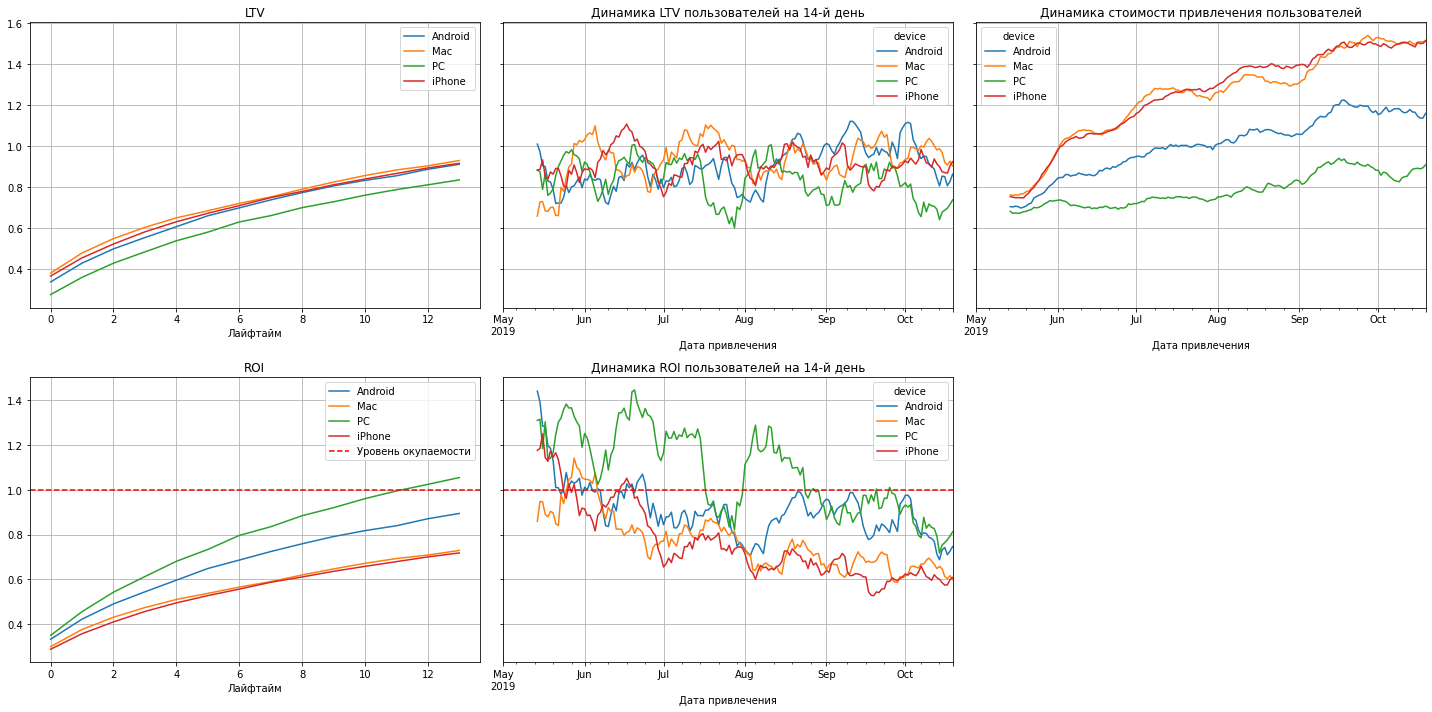

In [51]:
# смотрим окупаемость с разбивкой по устройствам
dimensions_d = ['device']

ltv_raw_d, ltv_grouped_d, ltv_history_d, roi_grouped_d, roi_history_d = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions_d
)

plot_ltv_roi(
    ltv_grouped_d, ltv_history_d, roi_grouped_d, roi_history_d, horizon_days, window=14
) 

- LTV пользователей разных устройств растет одинаковыми темпами, у PC LTV несколько ниже.
- Динамика LTV по устройствам совпадает
- **Стоимость привлечения пользователей на Mac и iPhone существенно выше, и именно эти пользователи не окупаются**. Также не окупаются пользователи Android.
- Привлечение пользователей на PC самое дешевое, эти клиенты окупаются к 11 дню, ROI к концу периода окупаемости 105%
- Динамика окупаемости отрицательная, с сентября даже ROI пользователей на PC становится ниже 100%.

Посмотрим конверсию и удержание по устройствам

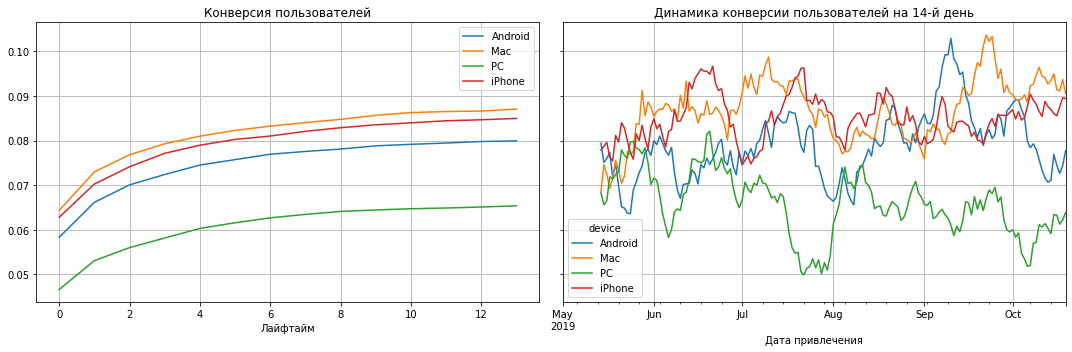

In [52]:
# смотрим конверсию по устройствам
conversion_raw_d, conversion_grouped_d, conversion_history_d = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions_d
)

#визуализируем
plot_conversion(conversion_grouped_d, conversion_history_d, horizon_days, window=14)

Конверсия и ее динамика по устройствам стабильна, резких провалов не было. Значит **рост CAC можно объяснить ростом стоимости рекламы.** Возможно, пользователи с устройствами на Mac и iPhone приходят из рекламных каналов, в которых регулярно происходит рост стоимости рекламы.

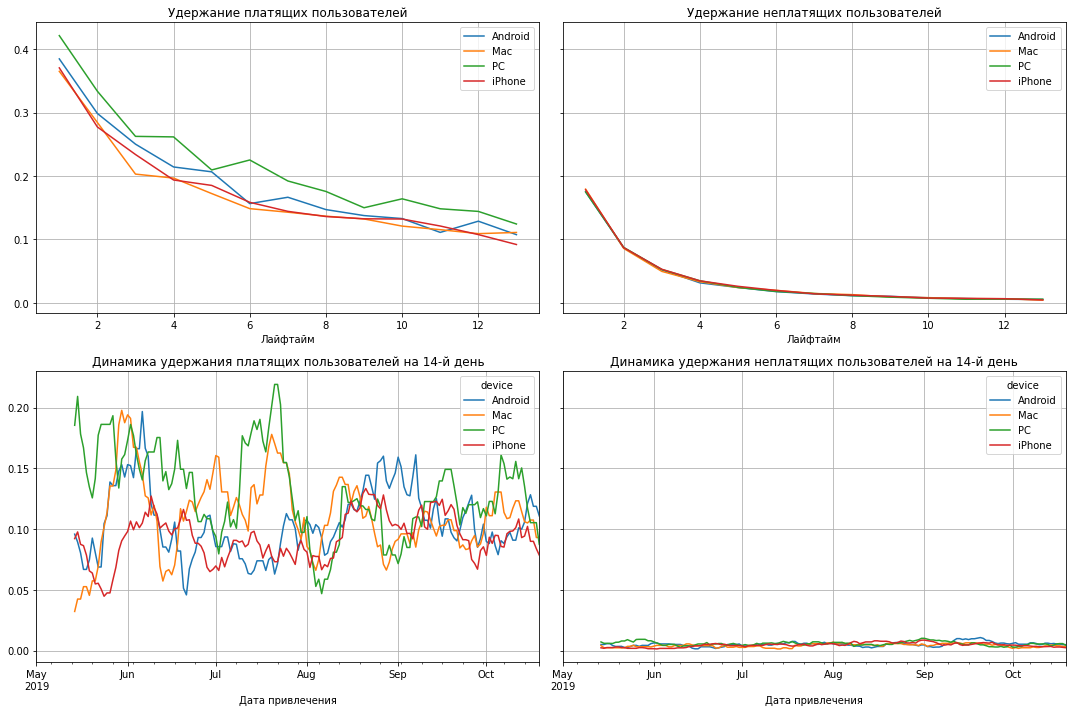

In [53]:
# смотрим удержание по устройствам
retention_raw_d, retention_grouped_d, retention_history_d = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions_d
)

#визуализируем в разрезе платящих/неплатящих пользователей
plot_retention(retention_grouped_d, retention_history_d, horizon_days, window=14) 

Платящие пользователи на PC удерживаются чуть лучше, чем на других устройствах, но у них ниже конверсия, поэтому ROI хоть и больше 100%, но имеет динамику к уменьшению. Я считаю, **стоит поискать пути увеличения конверсии пользователей на PC.**

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

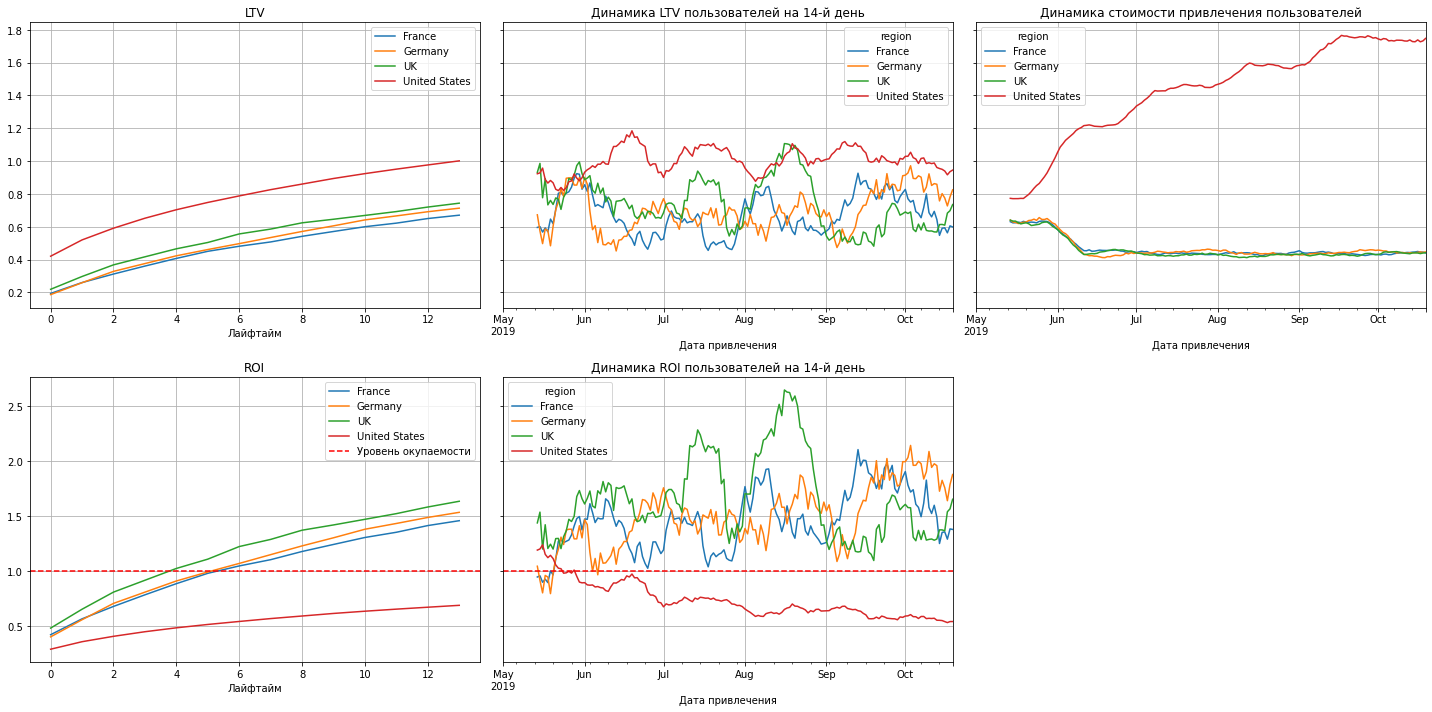

In [54]:
# смотрим окупаемость с разбивкой по странам
dimensions_r = ['region']

ltv_raw_r, ltv_grouped_r, ltv_history_r, roi_grouped_r, roi_history_r = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions_r
)

plot_ltv_roi(
    ltv_grouped_r, ltv_history_r, roi_grouped_r, roi_history_r, horizon_days, window=14
) 

- LTV пользователей из США выше остальных стран, но
- CAC пользователей из США растет огромными темпами, в то время как в других странах не меняется и находитсяна довольно низком уровне
- Т.о. окупаются все страны, кроме США, США перестало окупаться с июня, как раз когда был скачок CAC.

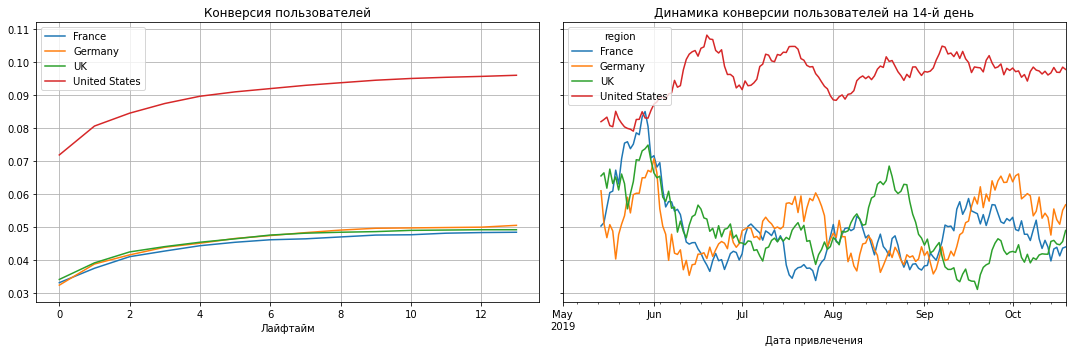

In [55]:
# смотрим конверсию по регионам
conversion_raw_r, conversion_grouped_r, conversion_history_r = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions_r
)

#визуализируем
plot_conversion(conversion_grouped_r, conversion_history_r, horizon_days, window=14)

- Конверсия пользователей из США почти в 2 раза выше, чем в остальных странах, динамика стабильная

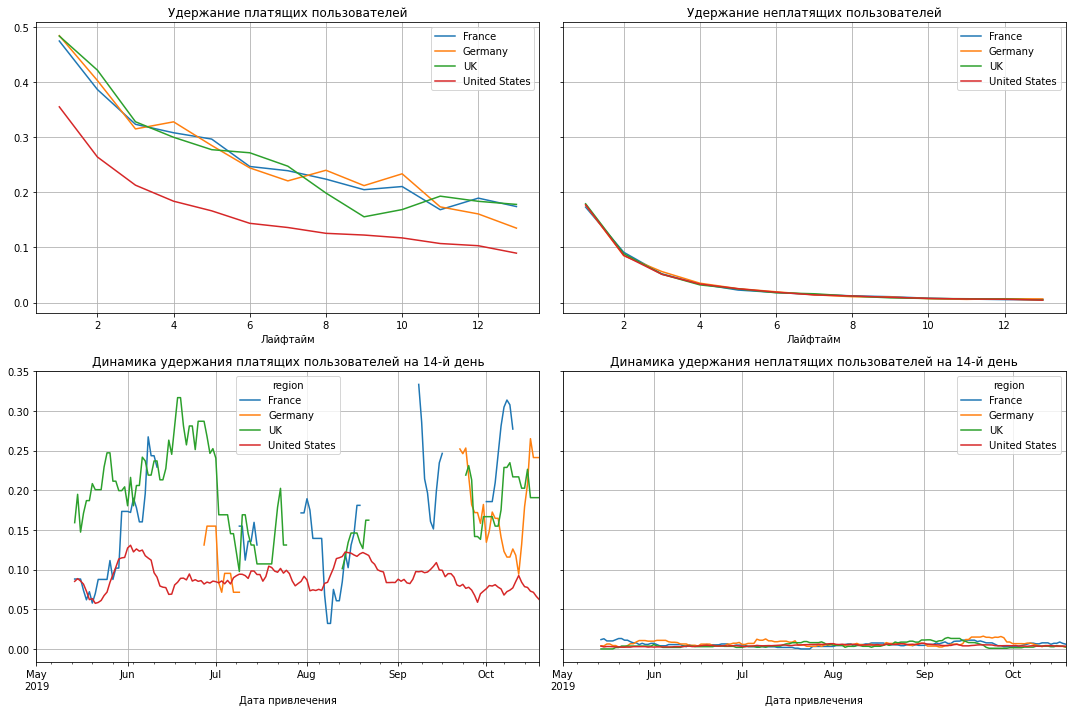

In [56]:
# смотрим удержание по странам
retention_raw_r, retention_grouped_r, retention_history_r = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions_r
)

#визуализируем в разрезе платящих/неплатящих пользователей
plot_retention(retention_grouped_r, retention_history_r, horizon_days, window=14) 

- Удержание платящих пользователей из США ниже остальных стран
- Т.о получается, что **пользователи из США хорошо конвертируются, но стоимость их привлечения очень высокая, хуже других удерживаются, но при этом имеют большой LTV**. Это дает нам точки роста и вывода их в окупаемость.

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

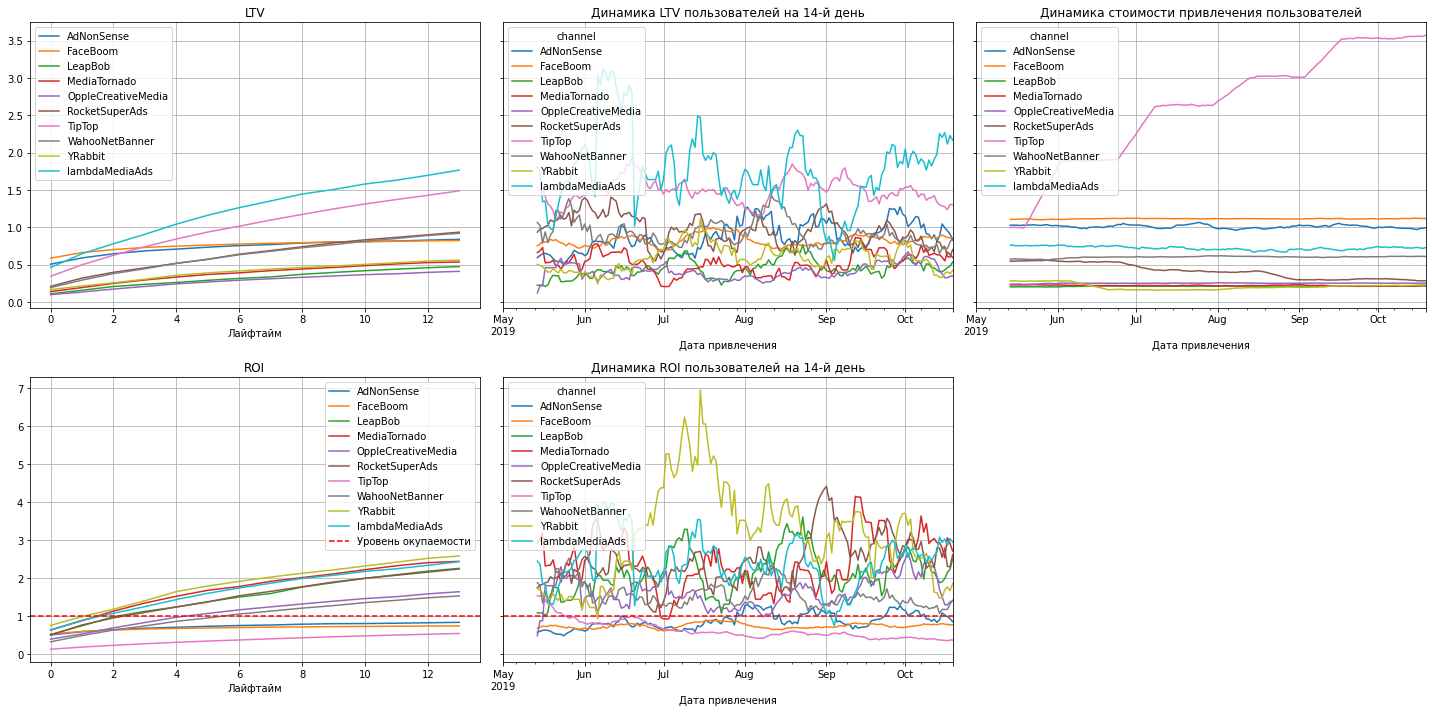

In [57]:
# смотрим окупаемость с разбивкой по рекламным каналам
dimensions_c = ['channel']

ltv_raw_c, ltv_grouped_c, ltv_history_c, roi_grouped_c, roi_history_c = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions_c
)

plot_ltv_roi(
    ltv_grouped_c, ltv_history_c, roi_grouped_c, roi_history_c, horizon_days, window=14
) 

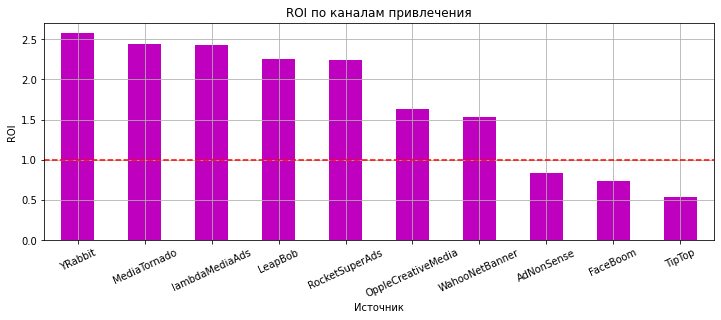

In [58]:
#ROI 14 дня, с окупаемостью
roi_channel = roi_grouped_c[[13]].sort_values(by = 13,ascending=False)

#визуализация таблицы ROI по каналам
fig, ax = plt.subplots(figsize=(12,4))

roi_channel.plot(kind = 'bar', ax=ax, grid = True, color = 'm', legend=False)

ax.set_xticks(np.arange(
    len(
        list(roi_channel.index)
    )))
ax.set_xticklabels(list(roi_channel.index), rotation=25)
plt.xlabel('Источник')
plt.ylabel('ROI')
plt.title('ROI по каналам привлечения')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.show;

- ROI пользователей, привлеченных из большинства каналов, выше уровня окупаемости
- Не окупаются TipTop, FaceBoom, AdNonSense, причем TipTop самый убыточный.
- У TipTop динамика стоимости привлечения пользователей показывает скачкообразный и сильный рост, за которым не следует роста LTV
- По остальным каналам CAC стабильна во времени
- **TipTop, FaceBoom - два канала, куда вкладывается больше всего маркетингового бюджета, и оба этих канала не окупаются.**

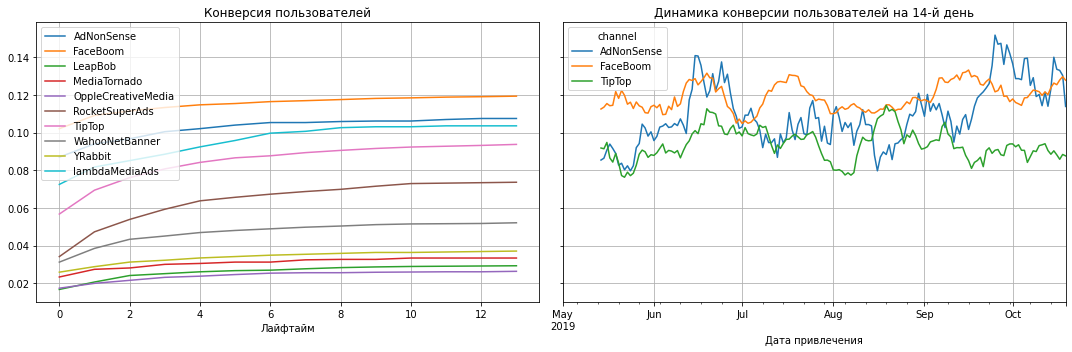

In [59]:
# смотрим конверсию по каналам
conversion_raw_c, conversion_grouped_c, conversion_history_c = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions_c
)

#визуализируем конверсию по каналам, динамику конверсии для неокупающихся каналов
plot_conversion(
    conversion_grouped_c, 
    conversion_history_c.loc[['TipTop', 'FaceBoom', 'AdNonSense']], 
    horizon_days, window=14)

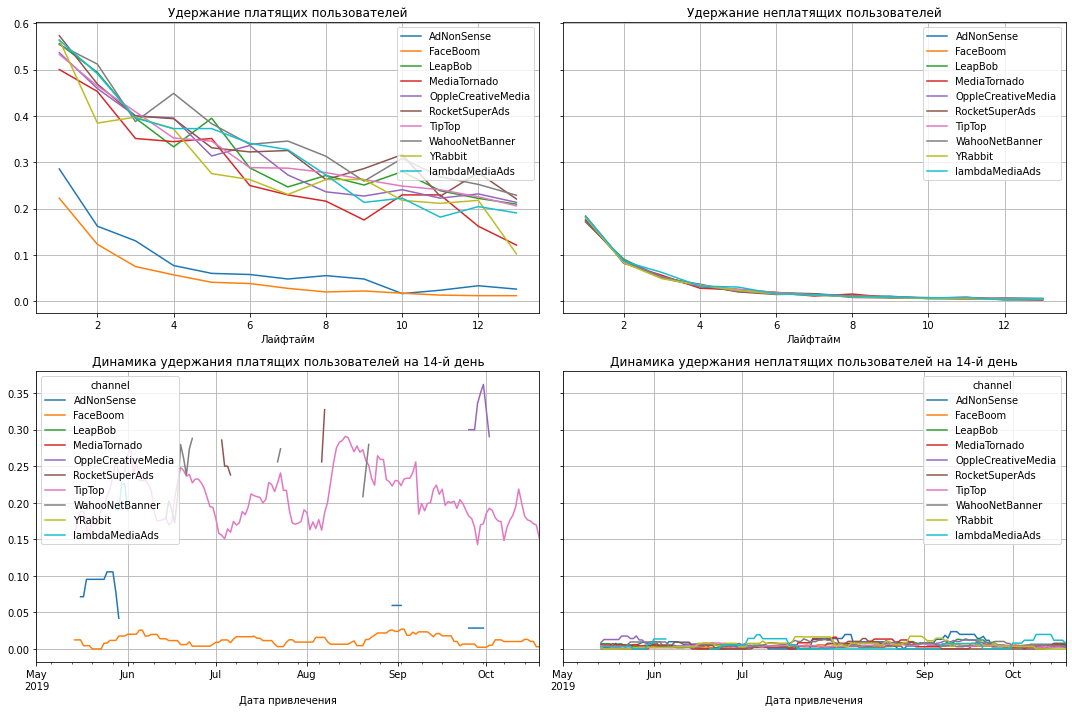

In [60]:
# смотрим удержание по каналам
retention_raw_c, retention_grouped_c, retention_history_c = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions_c
)

#визуализируем в разрезе платящих/неплатящих пользователей
plot_retention(retention_grouped_c, retention_history_c, horizon_days, window=14)

- Конверсия по времени по убыточным каналам стабильна
- TipTop удержание на высоком уровне, но большими темпами растет CAC, из-за этого канал не окупается
- у FaceBoom, AdNonSense очень низкий уровень удержания, в концу второй недели отваливаются почти все пользователи (более 98%)


#### Окупаемость в разрезе региона и устройства с каналом привлечения

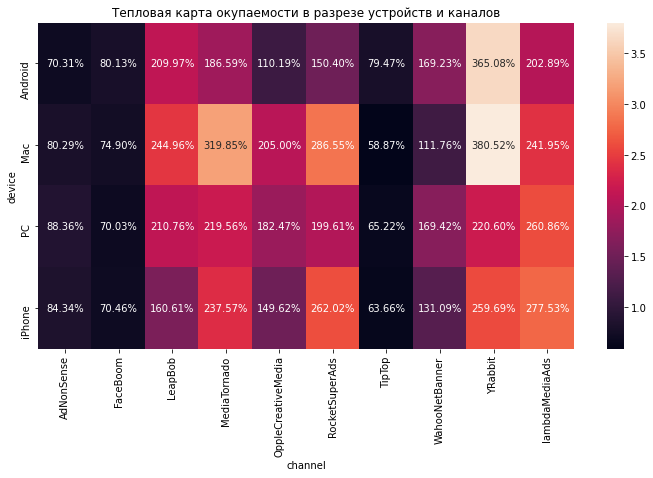

In [61]:
# смотрим окупаемость с разбивкой по устройству и каналу привлечения
dimensions_dc = ['device', 'channel']

ltv_all, ltv_grouped_all, ltv_history_all, roi_grouped_all, roi_history_all = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions_dc
)
#окупаемость на 14 день в зависимости от устройства и канала привлечения
roi_all = (roi_history_all[[13]]
           .rename(columns={13:'roi'})
           .reset_index()
           .pivot_table(
               index=['device'], columns='channel', values='roi', aggfunc='mean')
          )
# строим хитмэп
plt.figure(figsize=(12, 6))  # задаём размер графика
sns.heatmap(roi_all,
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта окупаемости в разрезе устройств и каналов')  # название графика
plt.show();

- Из тепловой карты видим, что окупаемость зависит не от устройства, а от канала привлечения

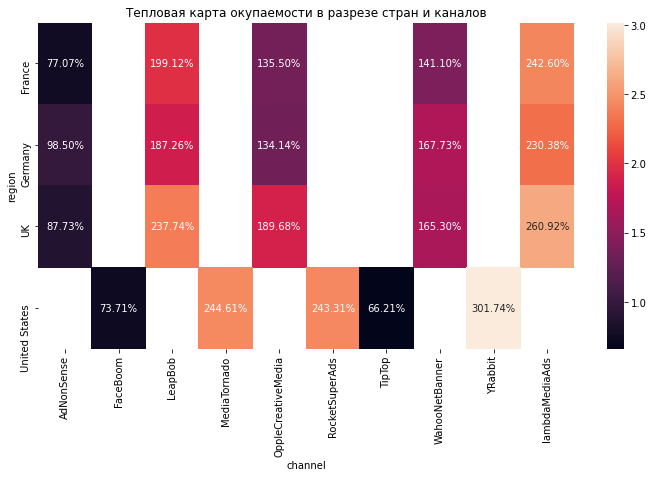

In [62]:
# смотрим окупаемость с разбивкой по региону и каналу привлечения
dimensions_rc = ['region', 'channel']

ltv_all, ltv_grouped_all, ltv_history_all, roi_grouped_all, roi_history_all = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions_rc
)
#окупаемость на 14 день в зависимости от региона, и канала привлечения
roi_all = (roi_history_all[[13]]
           .rename(columns={13:'roi'})
           .reset_index()
           .pivot_table(
               index=['region'], columns='channel', values='roi', aggfunc='mean')
          )
# строим хитмэп
plt.figure(figsize=(12, 6))  # задаём размер графика
sns.heatmap(
    roi_all,
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта окупаемости в разрезе стран и каналов')  # название графика
plt.show();

- Из тепловой карты видим, что разные рекламные площадки представлены в разных регионах (США и Европа)
- При формировании маркетинговой стратегии стоит учитывать окупаемость, выбирать площадки, где она больше 100%
- Что касается пользователей с Mac и iPhone, Android, которые не окупаются, дело в том, что в основном эти пользователи из США (см. таблицу ниже), а США не окупается из-за убыточных каналов TipTop и FaceBoom. Т.о. подтвердилось, что окупаемость не зависит от устройства

In [63]:
profiles.query('payer == True').pivot_table(
               index=['device'], columns='region', values='user_id', aggfunc='count')

region,France,Germany,UK,United States
device,,,,
Android,148,144,173,1317
Mac,69,48,49,1507
PC,221,200,243,630
iPhone,116,98,104,2654


#### Выводы по разделу

- Реклама, направленная на привлечение пользователей в целом, не окупается
- Mac и iPhone, Android устройства, пользователи из США и рекламные каналы TipTop, FaceBoom, AdNonSense оказывают негативное влияние на окупаемость рекламы
- Однако как мы выяснили выше, основная проблема в каналах привлечения, а не в стране или устройстве
- Проблемы окупаемости вызваны тем, что у канала TipTop большими темпами растет CAC, из-за этого канал не окупается, в у FaceBoom, AdNonSense очень низкий уровень удержания, в концу второй недели отваливаются почти все пользователи (более 98%)

**Рекомендации:**
- Отказаться от рекламы в TipTop, перераспределить бюджет на RocketSuperAds, т.е на окупающиеся площадки, работающие в том же регионе, имеющие высокий уровень удержания
- Выяснить причины такого высокого уровня отвалов в FaceBoom, AdNonSense, если их возможно устранить, то это позволит повысить LTV и выйти в окупаемость

### Выводы

- Пользователи приходят из 4 стран: США, Франция, Германия и Вликобритания
- Они пользуются устройствами Mac, iPhone, Android, PC
- Стоимость привлечение пользователей из различных рекламных каналов сильно отличается. Средняя стоимость привлечение одного пользователя из TipTop существенно выше привлечения из других источников (2,8), на втором месте FaceBoom, на третьем AdNonSense, на последнем - LeapBob (0,21), привлечение из органики бесплатно. Средний CAC = 1,13.
- В среднем каждый клиент к конце второй недели приносит 0,90.
- Расходы на привлечение клиента окупаются, когда накопленный доход от него превышает стоимость привлечения. **Реклама, направленная на привлечение пользователей в целом, не окупается**.
- Причины неэффективности привлечения пользователей: вложения в рекламу каналов, которые не окупаются. Больше всего денег потратили на **TipTop** (54,7 тыс), на втором месте **FaceBoom** (32,4 тыс.). Расходы на остальные источники все вместе составили менее 20% маркетингового бюджета. Оба эти канала, а также канал **AdNonSense убыточны.**
- У TipTop динамика стоимости привлечения пользователей показывает скачкообразный и сильный рост, за которым не следует роста LTV, из-за этого канал не окупается. Возможно, причина в том, что канал - монополист в своей нише, поэтому диктует цены рынку и несколько раз за год поднимает стоимость рекламы.
- у FaceBoom, AdNonSense очень низкий уровень удержания, в концу второй недели отваливаются почти все пользователи (более 98%)


**Рекомендации для отдела маркетинга**
- Разные рекламные площадки представлены в разных регионах (США и Европа). При формировании маркетинговой стратегии стоит учитывать окупаемость и региональность, чтобы не потерять деньги, а также не лишиться пользователей из какого-либо региона.
- **Отказаться от рекламы в TipTop**, перераспределить бюджет на RocketSuperAds, т.е на окупающиеся площадки, работающие в том же регионе (США) и имеющие высокий уровень удержания.
- **Выяснить причины такого высокого уровня отвалов в FaceBoom, AdNonSense**, если их возможно устранить, то это позволит повысить LTV и выйти в окупаемость
- Привлечение пользователей на PC самое дешевое, эти клиенты окупаются к 11 дню, ROI к концу периода окупаемости 105%, однако у них ниже конверсия, поэтому ROI хоть и больше 100%, но имеет динамику к уменьшению. Я считаю, стоит поискать пути **увеличения конверсии пользователей на PC**.